<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M2_AG_GarciaCesar_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta = ('https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/datos_ventas.csv')
datos = pd.read_csv(ruta, sep = ';')
df = pd.DataFrame(datos)
df.head()

,Fecha_anual,Inversion,Ventas
0,1980,"1,00","4,61"
1,1981,"1,50","5,18"
2,1982,"2,00","5,09"
3,1983,"2,50","5,44"
4,1984,"3,00","0,62"


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha_anual  38 non-null     int64 
 1   Inversion    38 non-null     object
 2   Ventas       38 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


Se realiza un análisis del tipo variables, **inversión y ventas** son variables **cuantitativas continuas**, mientras que la variable fecha anual es **cualitativa ordinal**.

In [49]:
#Conversion de la variable ventas a numérica para realizar cálculos, se sustituyen las comas por puntos
if df['Ventas'].dtype == object:
  df['Ventas'] = pd.to_numeric(df['Ventas'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")
#Conversion de la variable inversión a numérica para realizar cálculos, se sustituyen las comas por puntos
if df['Inversion'].dtype == object:
  df['Inversion'] = pd.to_numeric(df['Inversion'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")

Text(1.1, 17.45, 'Bigote Superior: 17.45')

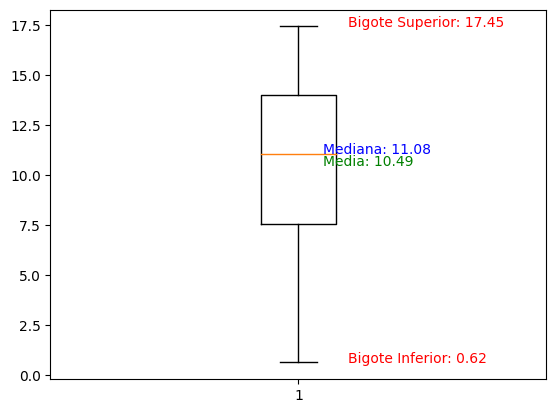

In [50]:
plt.boxplot(df['Ventas'])
mediana = np.median(df['Ventas'])
media = np.mean(df['Ventas'])
bigote_inferior = min(df['Ventas'])
bigote_superior = max(df['Ventas'])
plt.text(1.05, mediana, f'Mediana: {mediana:.2f}', color='blue', fontsize=10)
plt.text(1.05, media, f'Media: {media:.2f}', color='green', fontsize=10)
plt.text(1.1, bigote_inferior, f'Bigote Inferior: {bigote_inferior:.2f}', color='red', fontsize=10)
plt.text(1.1, bigote_superior, f'Bigote Superior: {bigote_superior:.2f}', color='red', fontsize=10)


En el boxplot se observa que los bigotes se extienden de 0.62 a 17.45 millones de euros, no se observan datos atípicos, la media de los datos es de 10.49 millones de euros y la mediana es de 11.08 millones de euros

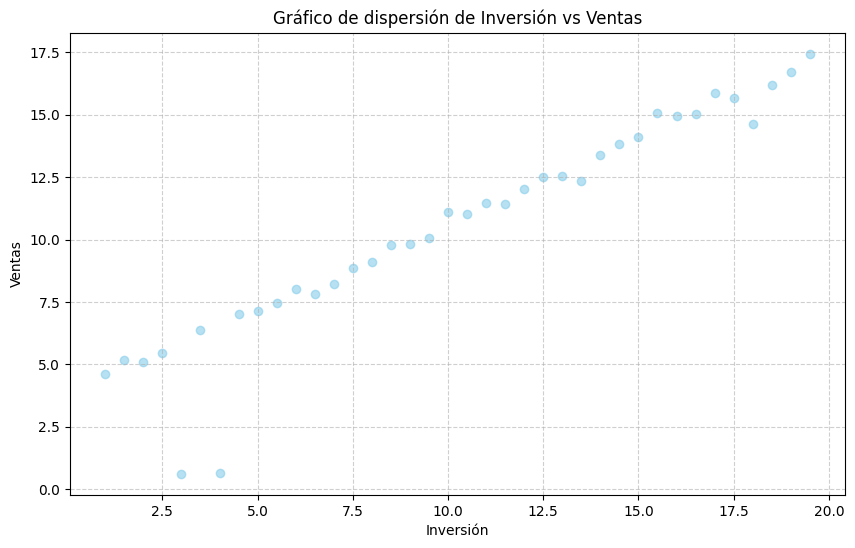

In [51]:
# Grafico de dispersión de IVA vs total_pagado
plt.figure(figsize=(10, 6))
plt.scatter(df['Inversion'], df['Ventas'], color='skyblue', alpha=0.6)
plt.title('Gráfico de dispersión de Inversión vs Ventas')
plt.xlabel('Inversión')
plt.ylabel('Ventas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Se realiza un gráfico de dispersión para analizar si las observaciones pueden seguir una recta de regresión lineal, se visualiza una "recta invisible", se identifica también que a medida que incrementa la inversión, el valor de ventas también incrementa

In [52]:
covarianza = np.cov(df['Inversion'], df['Ventas'], bias=True)[0, 1]
print("La covarianza entre las Ventas y la Inversión es:", covarianza)

La covarianza entre las Ventas y la Inversión es: 22.326513157894734


Al analizar la covarianza se tiene un resultado positivo de 22.3265, lo que indica que a medida incrementa la inversión el valor de ventas también incrementa

In [53]:
correlation = df['Inversion'].corr(df['Ventas'])
print("La correlación entre Inversion y Ventas es:", correlation)

La correlación entre Inversion y Ventas es: 0.9562823420491503


El coeficiente de correlación lineal de Pearson tiene un resultado de 0.9563, cercano a 1, esto indica que existe una relación lineal muy fuerte entre las variables analizadas de inversión y ventas

In [54]:
# Matriz de correlación
correlacion = df.corr()

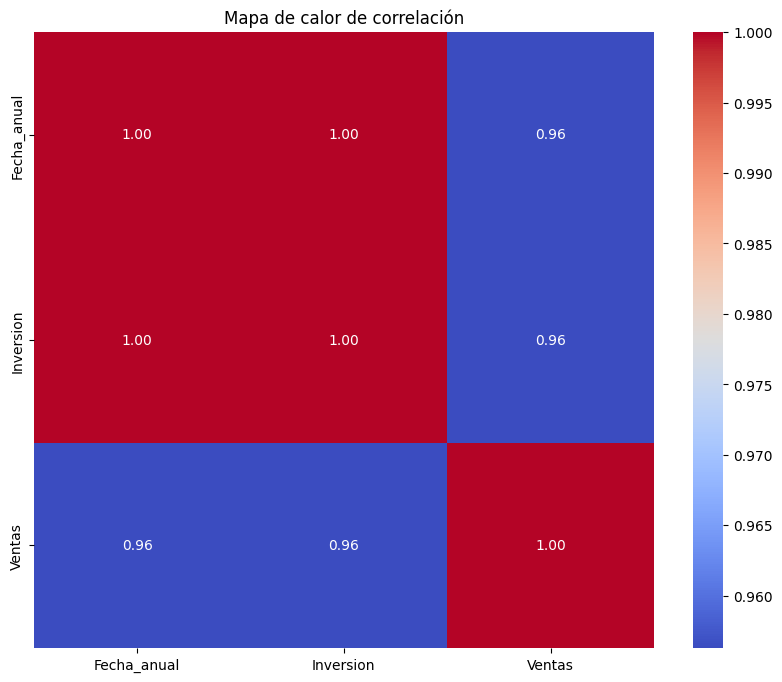

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

**Entre "Fecha_anual" e "Inversion":**
El coeficiente de correlación es 1.000, esto sugiere que hay una relación lineal positiva entre el año y la inversión. En otras palabras, a medida que avanza el tiempo, la inversión aumenta de manera lineal.

**Entre "Fecha_anual" y "Ventas":**
El coeficiente de correlación es 0.956, esto sugiere que hay una relación lineal muy fuerte entre el año y las ventas. Es probable que las ventas aumenten a medida que avanza el tiempo.

**Entre "Inversion" y "Ventas":**
El coeficiente de correlación es 0.956, esto sugiere que hay una relación lineal muy fuerte entre la inversión y las ventas. A medida que la inversión aumenta, es probable que las ventas también aumenten en proporción.

# **MODELO DE REGRESIÓN LINEAL**

Como Pearson da un número muy próximo a 1 (0.9563), se puede definir un modelo matemático a través de la regresión lineal.

Primero se calcula la pendiente de la recta de la siguiente manera:

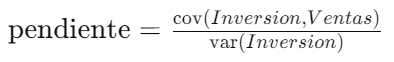

La covarianza fue calculada previamente, se procede a calcular la varianza de la inversión y se realiza el cálculo de la pendiente, esto es:

In [56]:
varianza = np.var(df['Inversion'])
print("La varianza de la Inversión es:", varianza)

La varianza de la Inversión es: 30.0625


In [57]:
pendiente = covarianza/varianza
print("El valor de la pendiente es: ", pendiente)

El valor de la pendiente es:  0.7426698763540868


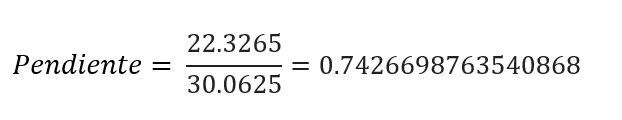

Esto da una medida de cuánto cambia la variable "Ventas" por cada cambio unitario en la variable "Inversión" en el modelo de regresión lineal.

El modelo de regresión lineal quedaría de la siguiente:

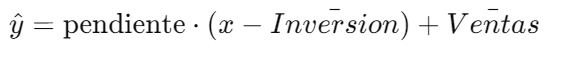

Se calculan la inversión media y la media de ventas para sustituir en la fórmula asociada a la recta de regresión de  Y  sobre  X, quedando de la siguiente manera:

In [58]:
media_inv = df['Inversion'].mean()
media_vent = df['Ventas'].mean()
print("La inversión media es:", media_inv)
print("La media de ventas es:", media_vent)

La inversión media es: 10.25
La media de ventas es: 10.492894736842103


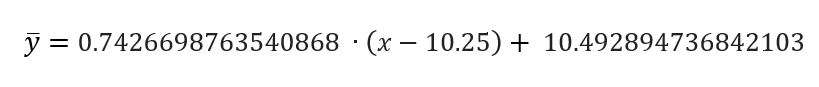

Esto puede simplificarse realizando un despeje de la siguiente forma:

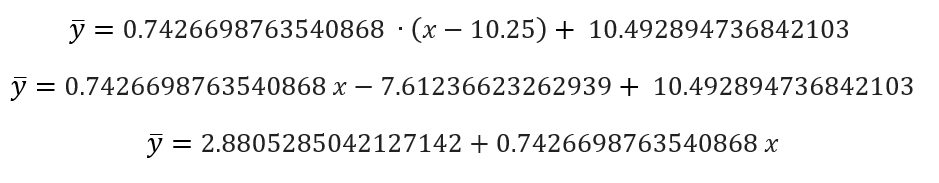

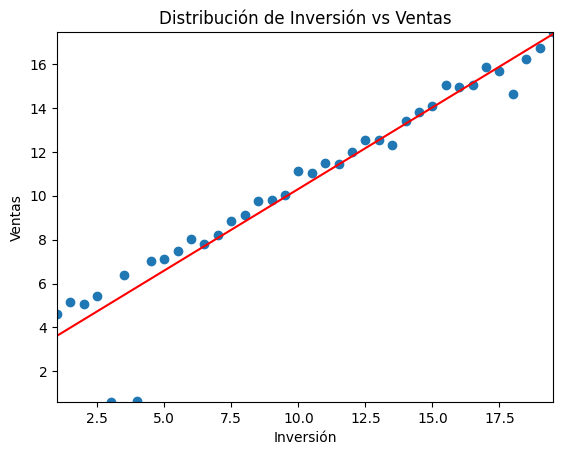

Intercepto (beta_0): 2.8805285042127142
Pendiente (beta_1): 0.7426698763540868


In [59]:
# Ajuste lineal
# Recta de Regresión Y sobre X
def recta(x):
    pendiente = df.cov()["Inversion"]["Ventas"]/df["Inversion"].var()
    return pendiente*(x-df["Inversion"].mean())+df["Ventas"].mean()

line = [recta(x) for x in np.arange(3000)]

# labels
plt.title("Distribución de Inversión vs Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(df["Inversion"].min() , df["Inversion"].max() )
plt.ylim(df["Ventas"].min() , df["Ventas"].max() )

# Nube de puntos + recta de regresión
plt.scatter(df["Inversion"],df["Ventas"])
plt.plot(line, color='red')
plt.show()

pendiente = df.cov()["Inversion"]["Ventas"]/df["Inversion"].var()
intercepto = df['Ventas'].mean() - pendiente * df['Inversion'].mean()

print("Intercepto (beta_0):", intercepto)
print("Pendiente (beta_1):", pendiente)

**El intercepto (beta_0)** representa el valor esperado de la variable dependiente cuando todas las variables independientes son iguales a cero. En este caso implica de que si el valor de la inversión es cero se espera una cantidad de ventas de 2.88 millones de euros, por otra parte, **la pendiente (beta_1)** indica cuánto cambia la variable dependiente por cada cambio unitario en la variable independiente. En este caso, la pendiente es aproximadamente 0.743 adimensional, esto significa que por cada millón de euros que cambie la inversión, se espera un cambio de aproximadamente 0.743 millones en las ventas.

El modelo matemático de regresión lineal simple asumiendo un error aleatorio quedaría de la siguiente manera:

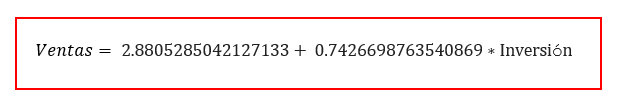

# **PREDICCIÓN DE VENTAS**

In [60]:
inversion = 7
ventas_pred = intercepto + pendiente*inversion
print("La predicción de ventas cuando la inversión es 7 millones es:", ventas_pred)

La predicción de ventas cuando la inversión es 7 millones es: 8.079217638691322


Se realiza la predicción de ventas al realizar la sustitución de una inversión de 7 millones de euros en el modelo matemático, se obtiene un resultado de 8.0792 millones de euros esperados en ventas

# **EVALUACIÓN DEL MODELO**

In [61]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# Ajustar el modelo de regresión lineal
X = df['Inversion'].values.reshape(-1, 1)  # Variable independiente
y = df['Ventas'].values.reshape(-1, 1)     # Variable dependiente

model = LinearRegression().fit(X, y)

# Predicciones del modelo
y_pred = model.predict(X)

# Calcular SSE (Suma de los errores cuadrados)
SSE = np.sum((y - y_pred) ** 2)
#Otra forma alternativa para calcular el SCE
#squared_errors = [(y[i][0] - y_pred[i][0]) ** 2 for i in range(len(y))]
#SCE = sum(squared_errors)

# Calcular SST (Suma total de los cuadrados)
SST = np.sum((y - np.mean(y)) ** 2)

# Calcular R cuadrado
r_squared = 1 - (SSE / SST)

# Calcular R cuadrado ajustado
n = len(y)
p = 1  # número de predictores (en este caso, solo hay uno: Inversión)
r_squared_adjusted = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

# Calcular R cuadrado de predicción
from sklearn.metrics import r2_score
r_squared_pred = r2_score(y, y_pred)

print("Model Summary")
print("SCE: {:.4f}".format(SSE))
print("S: {:.4f}".format(np.sqrt(SSE)))  # Raíz cuadrada de SSE
print("R-sq: {:.2f}%".format(r_squared * 100))  # R cuadrado
print("R-sq(adj): {:.2f}%".format(r_squared_adjusted * 100))  # R cuadrado ajustado
print("R-sq(pred): {:.2f}%".format(r_squared_pred * 100))  # R cuadrado de predicción


Model Summary
SCE: 58.9273
S: 7.6764
R-sq: 91.45%
R-sq(adj): 91.21%
R-sq(pred): 91.45%


1.	**Suma de Cuadrados del Error**: En este caso, la SCE es de 58.9273, lo que significa que la variabilidad total no explicada por el modelo es relativamente baja. Esto sugiere que el modelo es capaz de capturar la mayor parte de la variabilidad en los datos de ventas.
2. **Error Estándar de la Estimación:**
El valor del error estándar de la estimación (S) es relativamente bajo, lo que sugiere que el modelo tiene una buena capacidad para predecir los valores de la variable dependiente. Esto indica que los residuos del modelo (las diferencias entre los valores observados y los valores predichos) tienen una dispersión relativamente baja alrededor de la línea de regresión ajustada.
3.	**Coeficiente de Determinación:**
El coeficiente de determinación es del 91.45%, lo que significa que aproximadamente el 91.45% de la variabilidad total en la variable dependiente puede ser explicada por el modelo de regresión lineal. Este valor es bastante alto, lo que sugiere que el modelo es capaz de capturar una gran parte de la variabilidad en los datos de ventas utilizando la variable independiente (inversión) proporcionada.
4.	**Coeficiente de Determinación Ajustado:**
El coeficiente de determinación ajustado es del 91.21%. Un valor alto del coeficiente de determinación ajustado sugiere que el modelo no está sobreajustado y proporciona una buena representación de los datos.
5.	**Coeficiente de Determinación de Predicción:**
El coeficiente de determinación de predicción es del 91.45%. Este valor indica la capacidad del modelo para hacer predicciones precisas en nuevos datos. Un valor alto de  sugiere que el modelo es capaz de hacer predicciones precisas y generalizar bien a nuevos datos.
